In [1]:
import numpy as np
import matplotlib.pyplot as plt

Stochastic DE

$$ \dot{x_1} = -V^\prime _1 (x_1) - k_1 x_2 + \sqrt{k_B T_1}ξ_1 $$
$$ \dot{x_2} = -V^\prime _2 (x_2) - k_2 x_1 + \sqrt{k_B T_2}ξ_2 $$

$$ V_1 = \frac{a_1}{2} (x_1)^2, V_2 = \frac{a_2}{2} (x_2)^2 $$

$$ \dot{x_1} = -a_1 (x_1) - k_1 x_2 + \sqrt{k_B T_1}ξ_1 $$
$$ \dot{x_2} = -a_2 (x_2) - k_2 x_1 + \sqrt{k_B T_2}ξ_2 $$

Euler Scheme

$$ X_{t+\Delta t} = X_t + f(X_t, t)\Delta t + g(X_t,t)\Delta B_t $$

where $$ \Delta B_t = \mathcal{N}(0, \sqrt\Delta t) $$

In [2]:
def euler_one_traj(n_time, pars):   
    #initial condition
    x1 = 0
    x2 = 0
    theta_traj = []
    x1_traj = []
    x2_traj = []
    
    #performing 1 traj with n_time number of data points
    for i in range(n_time):
        #generate delta_B
        s1 = np.random.normal(0, np.sqrt(pars['delta_t']) )
        s2 = np.random.normal(0, np.sqrt(pars['delta_t']) )
        #solve for x1, x2
        x1_new = x1 - pars['a1']*x1*pars['delta_t'] - pars['k1']*x2*pars['delta_t'] + np.sqrt(pars['Kb']*pars['T1'])*s1
        x2_new = x2 - pars['a2']*x2*pars['delta_t'] - pars['k2']*x1*pars['delta_t'] + np.sqrt(pars['Kb']*pars['T2'])*s2
        x1 = x1_new
        x2 = x2_new
        
        x1_traj.append(x1)
        x2_traj.append(x2)
    return x1_traj, x2_traj

In [3]:
def euler_n_traj(max_time, pars):
    min_time = 0
    n_time = int((max_time - min_time)/pars['delta_t'] + 1) #n_time = num of evenly spaced samples (ex. 1001 points)
    time = np.linspace(min_time, max_time, n_time) #time(ex. 0 (min time), 0.01, 0.02, ..., 10 (max time)) with n_time no. of data points
    
    x1_traj_list = []
    x2_traj_list = []
    for i in range(pars['n_realizations']):
        x1_traj, x2_traj = euler_one_traj(n_time, pars)
        x1_traj_list.append(x1_traj)
        x2_traj_list.append(x2_traj)
        
    return x1_traj_list, x2_traj_list, time

In [4]:
def plotter_traj(x1_traj_list, x2_traj_list):
    fig, ax = plt.subplots(1, 3, figsize=(15,3))

    for x in x1_traj_list:
        ax[0].plot(time, x)
    for y in x2_traj_list:
        ax[1].plot(time, y)
    for x,y in zip(x1_traj_list, x2_traj_list):
        ax[2].plot(x,y)

    ax[0].set_xlabel('t')
    ax[0].set_ylabel('x1')

    ax[1].set_xlabel('t')
    ax[1].set_ylabel('x2')

    ax[2].set_xlabel('x1')
    ax[2].set_ylabel('x2')

    plt.tight_layout()
    plt.show()

In [5]:
def plotter_histogram(T1, T2, x1_traj_list, x2_traj_list):
    #obtain the last element of x1_traj_list
    x1_list = []
    for x in x1_traj_list:
        last_elementx1 = x[-1]
        x1_list.append(last_elementx1)

    #obtain the last element of x2_traj_list
    x2_list = []
    for y in x2_traj_list:
        last_elementx2 = y[-1]
        x2_list.append(last_elementx2)

    mean_x1 = np.mean(x1_list)
    std_x1 = np.std(x1_list)
    mean_x2 = np.mean(x2_list)
    std_x2 = np.std(x2_list)


    plt.figure(figsize=(10,4))
    plt.hist(x1_list, histtype='step', density = True, bins = 30, label='x1')
    plt.hist(x2_list, histtype='step', density = True, bins = 30, label='x2')
    plt.title('x1: Mean: {:.3g} and Std Dev: {:.3g} \n X2: Mean: {:.3g} and Std Dev: {:.3g}'.format(mean_x1, std_x1, mean_x2, std_x2))
    
    plt.suptitle('T1: {}, T2: {}'.format(T1, T2))
    plt.xlabel('x')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [6]:
#paramaters
pars = {}
pars['a1'] = 1
pars['k1'] = 1
pars['T1'] = 100
pars['a2'] = 1
pars['k2'] = 1
pars['T2'] = 100

pars['delta_t'] = 0.01
pars['Kb'] = 1.38*np.exp(-23)

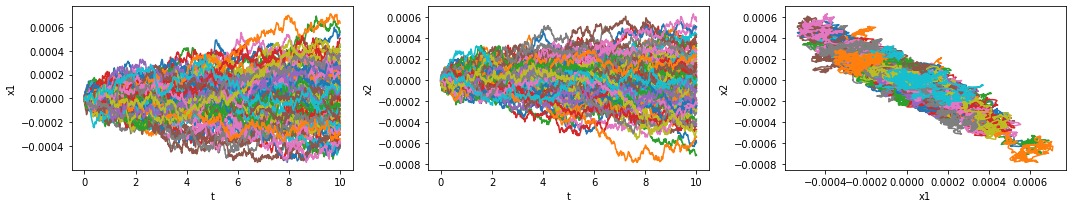

In [7]:
#plot trajectories with t = 10s
pars['n_realizations'] = 100
x1_traj_list, x2_traj_list, time = euler_n_traj(10, pars)
plotter_traj(x1_traj_list, x2_traj_list)

Plot probability distributions

Setting T1 = T2

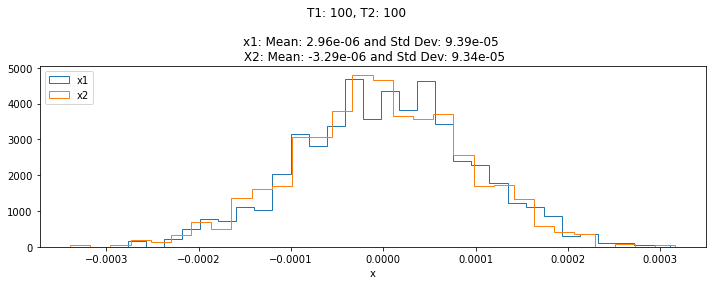

In [8]:
#plot histogram with t = 1s
pars['T1'] = 100
pars['T2'] = 100
pars['n_realizations'] = 1000
x1_traj_list, x2_traj_list, time = euler_n_traj(1, pars)
plotter_histogram(pars['T1'], pars['T2'], x1_traj_list, x2_traj_list)

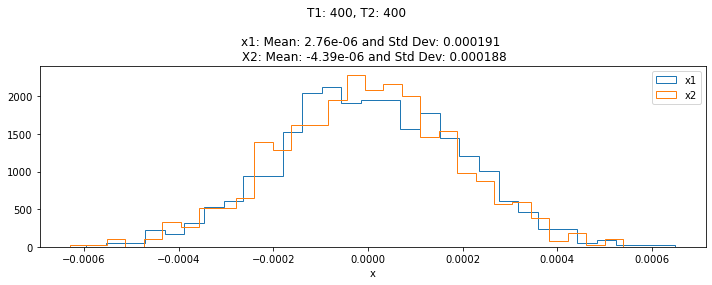

In [9]:
#plot histogram with t = 1s
pars['T1'] = 400
pars['T2'] = 400
pars['n_realizations'] = 1000
x1_traj_list, x2_traj_list, time = euler_n_traj(1, pars)
plotter_histogram(pars['T1'], pars['T2'], x1_traj_list, x2_traj_list)

Mean and variance are of the same order for x1 and x2 when T1 = T2

Setting T2 > T1

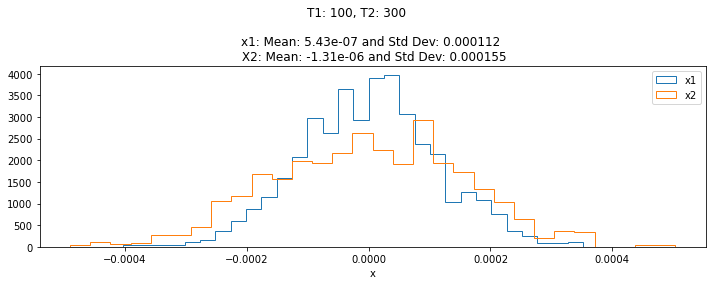

In [10]:
#plot histogram with t = 1s
pars['T1'] = 100
pars['T2'] = 300
pars['n_realizations'] = 1000
x1_traj_list, x2_traj_list, time = euler_n_traj(1, pars)
plotter_histogram(pars['T1'], pars['T2'], x1_traj_list, x2_traj_list)

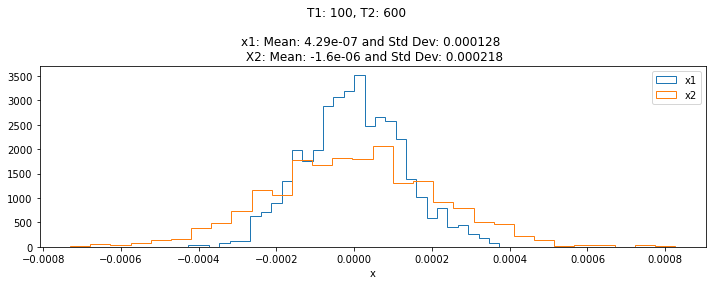

In [11]:
#plot histogram with t = 1s
pars['T1'] = 100
pars['T2'] = 600
pars['n_realizations'] = 1000
x1_traj_list, x2_traj_list, time = euler_n_traj(1, pars)
plotter_histogram(pars['T1'], pars['T2'], x1_traj_list, x2_traj_list)

Mean and variance is larger for x2 when T2 > T1

Check for different temperatures

In [12]:
def calc_mean_std_diffT(T2_range, similarT=True):
    mean_x1_list = []
    std_x1_list = []
    mean_x2_list = []
    std_x2_list = []
    
    for i in T2_range:
        pars['T2'] = i
        if similarT == True:
            pars['T1'] = i
        else:
            pars['T1'] = 100
            
        x1_traj_list, x2_traj_list, time = euler_n_traj(1, pars)

        x1_list = []
        for x in x1_traj_list:
            last_elementx1 = x[-1]
            x1_list.append(last_elementx1)

        #obtain the last element of x2_traj_list
        x2_list = []
        for y in x2_traj_list:
            last_elementx2 = y[-1]
            x2_list.append(last_elementx2)

        mean_x1 = np.mean(x1_list)
        std_x1 = np.std(x1_list)
        mean_x2 = np.mean(x2_list)
        std_x2 = np.std(x2_list)

        mean_x1_list.append(mean_x1)
        std_x1_list.append(std_x1)
        mean_x2_list.append(mean_x2)
        std_x2_list.append(std_x2)
    return mean_x1_list, std_x1_list, mean_x2_list, std_x2_list

In [13]:
%%time
pars['n_realizations'] = 1000
T2_range = np.linspace(100,1000,50)
mean_x1_list, std_x1_list, mean_x2_list, std_x2_list = calc_mean_std_diffT(T2_range,similarT=True)

Wall time: 53.1 s


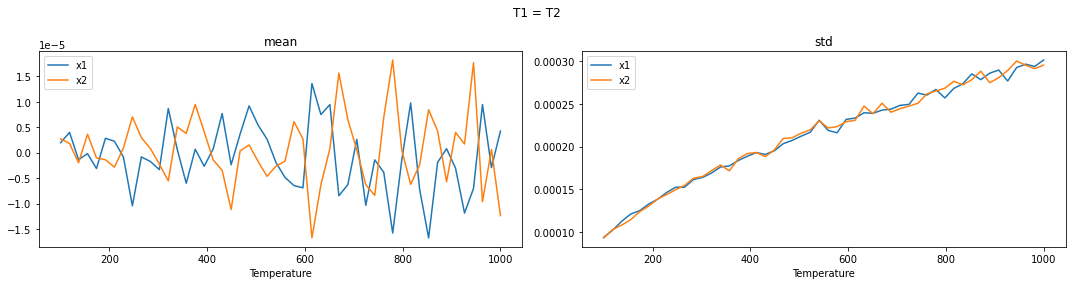

In [14]:
fig, ax = plt.subplots(1,2, figsize=(15,4))
ax[0].plot(T2_range, mean_x1_list, label='x1')
ax[0].plot(T2_range, mean_x2_list, label='x2')

ax[1].plot(T2_range, std_x1_list, label='x1')
ax[1].plot(T2_range, std_x2_list,label='x2')

ax[0].set_title('mean')
ax[1].set_title('std')

ax[0].set_xlabel('Temperature')
ax[1].set_xlabel('Temperature')

plt.suptitle('T1 = T2')
ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.show()

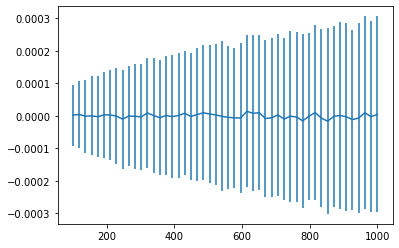

In [15]:
#if I plot the mean and std in one plot, std is too large 
plt.errorbar(T2_range, mean_x1_list, std_x1_list)
plt.show()

In [16]:
%%time
pars['n_realizations'] = 1000
T2_range = np.linspace(100,1000,50)
mean_x1_list, std_x1_list, mean_x2_list, std_x2_list = calc_mean_std_diffT(T2_range,similarT=False)

Wall time: 53 s


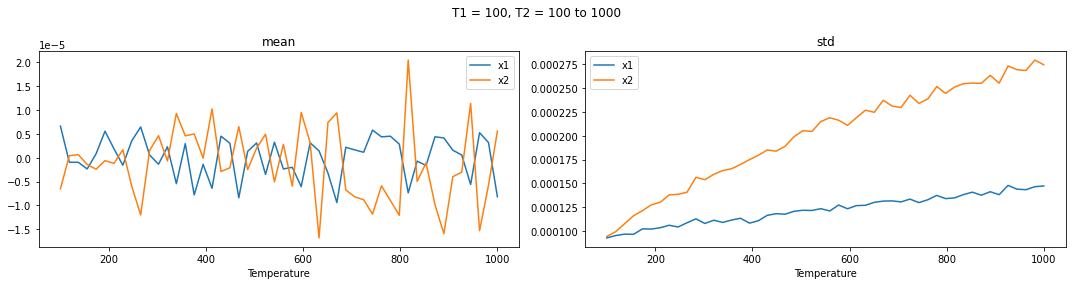

In [17]:
fig, ax = plt.subplots(1,2, figsize=(15,4))
ax[0].plot(T2_range, mean_x1_list, label='x1')
ax[0].plot(T2_range, mean_x2_list, label='x2')

ax[1].plot(T2_range, std_x1_list, label='x1')
ax[1].plot(T2_range, std_x2_list,label='x2')

ax[0].set_title('mean')
ax[1].set_title('std')

ax[0].set_xlabel('Temperature')
ax[1].set_xlabel('Temperature')

plt.suptitle('T1 = 100, T2 = 100 to 1000')
ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.show()